In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Implementing Simple K-Nearest Neighbor (KNN)

In [32]:
# Load the dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
X = newsgroups.data
y = newsgroups.target

In [33]:
# Vectorize the text data
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

In [34]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [35]:
# Range of k values to test
k_values = range(1, 30)
accuracies = []

In [36]:
k_values

range(1, 30)

In [37]:
# Test classification accuracy for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

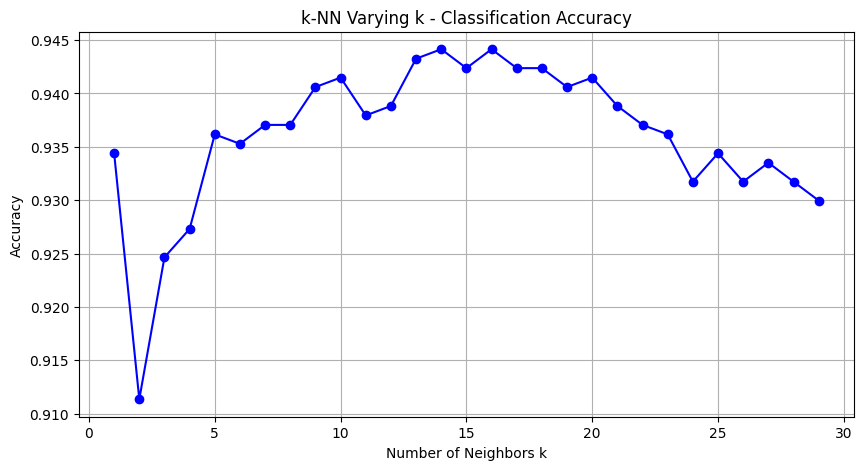

In [38]:
# Plotting accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Varying k - Classification Accuracy')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

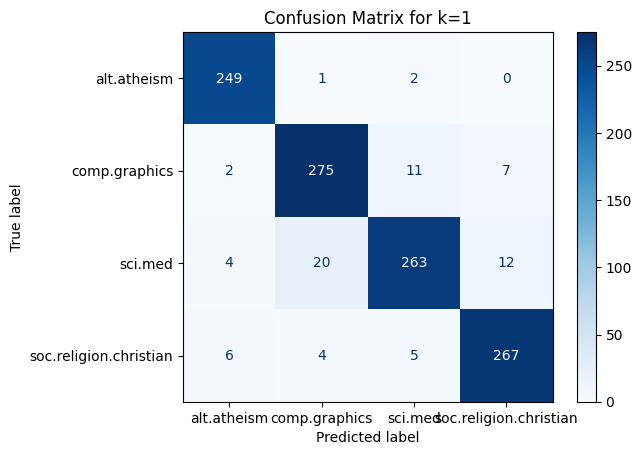

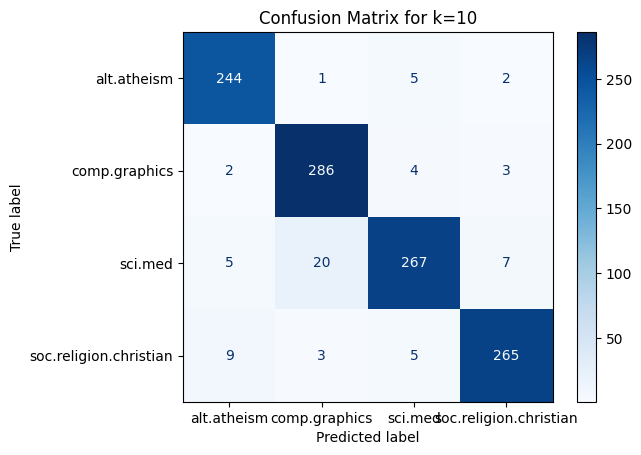

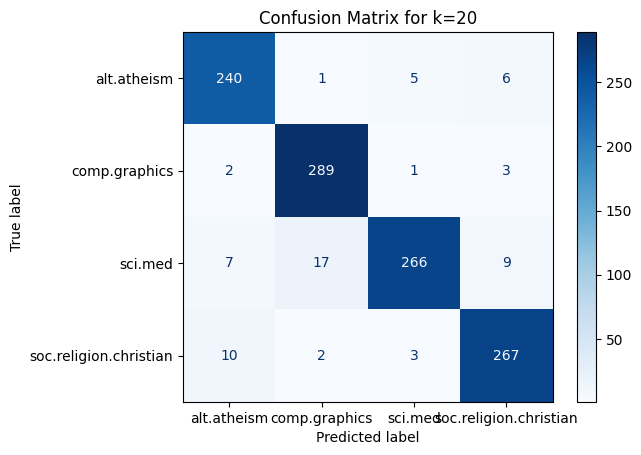

In [39]:
# Function to plot confusion matrix
def plot_confusion_matrix(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for k={k}')
    plt.show()

# Plot confusion matrices for k = 1, 10, 20
for k in [1, 10, 20]:
    plot_confusion_matrix(k)

# Implementing Advanced KNN /w Images and Preprocessing

In [46]:
# Load the LFW people dataset
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [47]:
# Data and label arrays
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
images = lfw_people.images

In [48]:
# Print dataset size and dimensions
print("Total dataset size:")
print(f"n_samples: {X.shape[0]}")
print(f"n_features: {X.shape[1]}")
print(f"n_classes: {len(target_names)}")

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [49]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

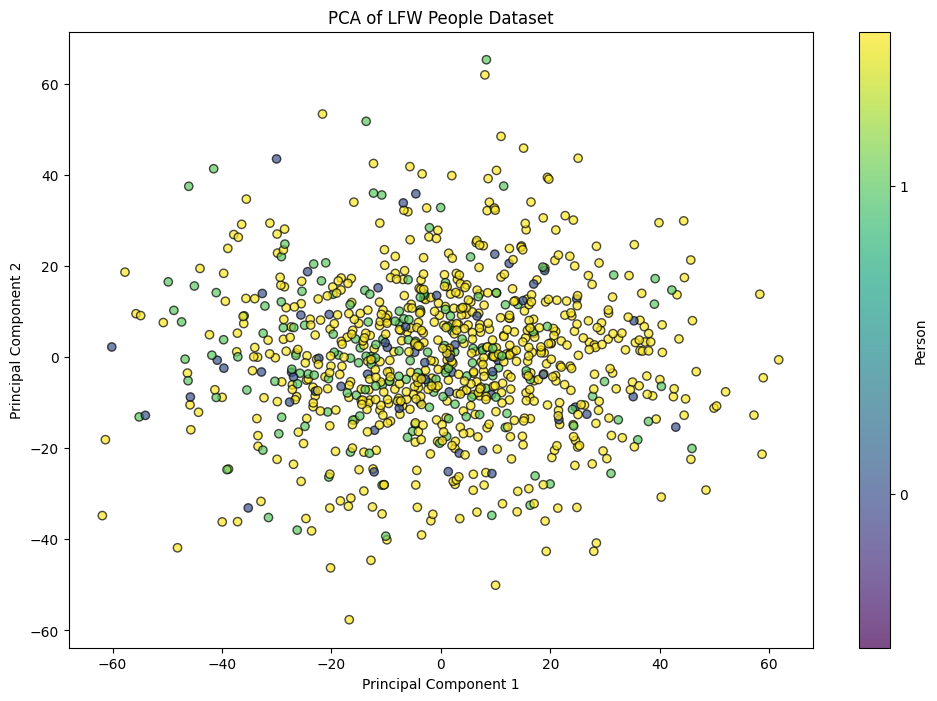

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X_scaled, y, images, test_size=0.3, random_state=42)

# PCA to reduce dimensionality for visualization and faster kNN
pca = PCA(n_components=100)  # Reduced to 100 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the PCA results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA of LFW People Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(n_classes), label='Person')
plt.clim(-0.5, n_classes - 0.5)
plt.show()

In [60]:
# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Predicting on the test dataset
y_pred = knn.predict(X_test_pca)

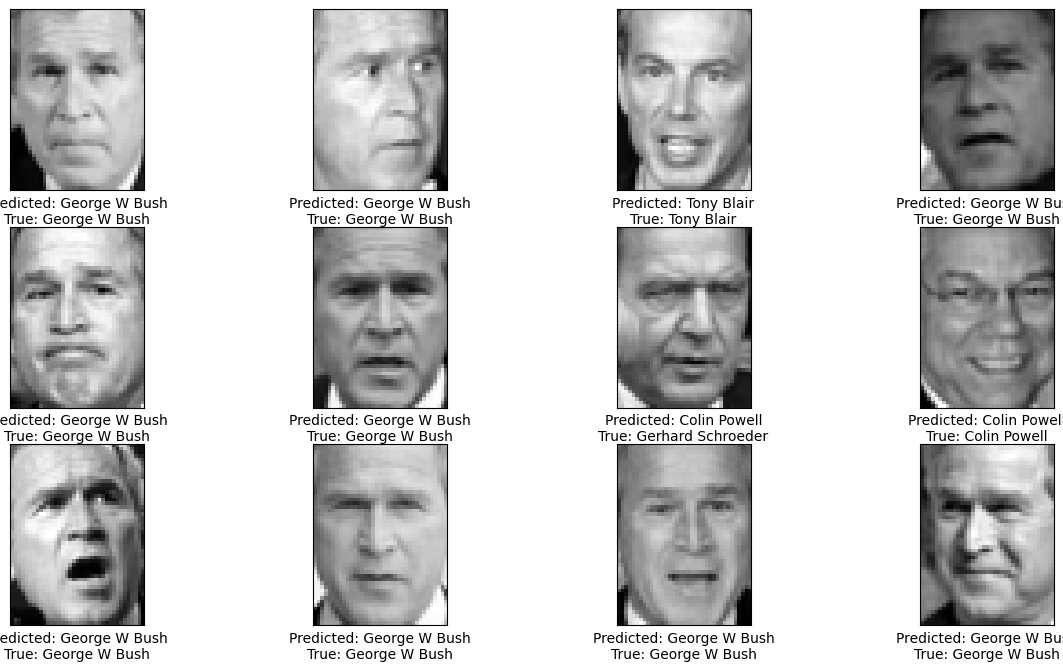

In [61]:
# Displaying a sample of the test set images along with their predicted labels
fig, ax = plt.subplots(3, 4, figsize=(15, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_test[i].reshape(50, 37), cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel=f'Predicted: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}')

<Figure size 1000x1000 with 0 Axes>

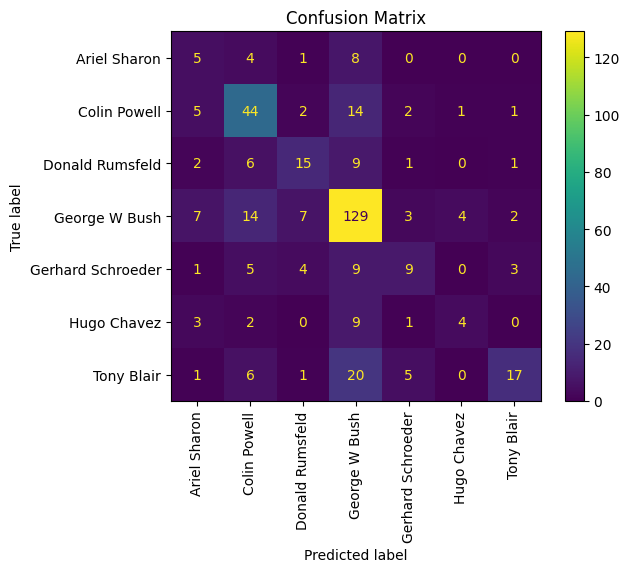

In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
